In [87]:
# import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# define the root folder where experiment results are located
root_folder = "experiment results"

### Reading scores from experiments

In [88]:
all_results = pd.DataFrame()

# iterate through each experiment folder
for experiment in os.listdir(root_folder):
    experiment_path = os.path.join(root_folder, experiment)
    if os.path.isdir(experiment_path):  # check if it's a folder
        for csv_file in os.listdir(experiment_path):
            if csv_file.endswith(".csv"):
                csv_path = os.path.join(experiment_path, csv_file)
                
                # read the CSV file
                df = pd.read_csv(csv_path)
                df.index = ['Web Devs', 'ML Eng', 'accuracy', 'macro', 'weighted']

                precision_macro = df.loc['macro', 'precision'].round(3)
                recall_macro = df.loc['macro', 'recall'].round(3)
                f1_macro = df.loc['macro', 'f1-score'].round(3)
                
                precision_weighted = df.loc['weighted', 'precision'].round(3)
                recall_weighted = df.loc['weighted', 'recall'].round(3)
                f1_weighted = df.loc['weighted', 'f1-score'].round(3)
                
                accuracy = df.loc['accuracy', 'precision'].round(3)

                result_row = {
                    'Experiment': experiment,
                    'Model': os.path.splitext(csv_file)[0],
                    'precision_macro': precision_macro,
                    'recall_macro': recall_macro,
                    'f1_macro': f1_macro,
                    'precision_weighted': precision_weighted,
                    'recall_weighted': recall_weighted,
                    'f1_weighted': f1_weighted,
                    'accuracy': accuracy
                }

                all_results = pd.concat([all_results, pd.DataFrame([result_row])], ignore_index=True)   

In [106]:
summary_path = os.path.join(root_folder, 'summary_results.csv')
if os.path.exists(summary_path):
    os.remove(summary_path)
    
all_results = all_results.sort_values(by='f1_macro', ascending=False)
all_results.to_csv(summary_path, index=False)
print("Combined Results:")
print(f"Summary results saved to: {summary_path}")

all_results.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .set_table_styles(
            [
                {'selector': 'th', 'props': [('background-color', 'lightcoral'), ('color', 'black'), ('font-weight', 'bold')]},


                {'selector': 'td:nth-child(1)', 'props': [('background-color', '#e09f55'), ('color', 'black'), ('font-weight', 'bold')]},
                {'selector': 'td:nth-child(2)', 'props': [('background-color', '#e0b889'), ('color', 'black'), ('font-weight', 'bold')]}
            ]
  ) \
.hide(axis="index")

Combined Results:
Summary results saved to: experiment results\summary_results.csv


EXPERIMENT,MODEL,PRECISION_MACRO,RECALL_MACRO,F1_MACRO,PRECISION_WEIGHTED,RECALL_WEIGHTED,F1_WEIGHTED,ACCURACY
it5_clique_wofeat_imblearn_5,HistGradientBoostingClassifier,"0,763","0,764","0,763","0,820","0,820","0,820","0,820"
it5_clique_wofeat_imblearn_5,SGDClassifier1,"0,777","0,751","0,762","0,821","0,828","0,823","0,828"
it5_clique_wofeat_woimblearn_5,HistGradientBoostingClassifier,"0,803","0,740","0,762","0,829","0,837","0,828","0,837"
it5_clique_wofeat_woimblearn_5,LogisticRegression,"0,745","0,770","0,755","0,817","0,804","0,809","0,804"
it5_clique_wofeat_imblearn_5,LogisticRegression,"0,744","0,770","0,754","0,817","0,803","0,808","0,803"
it3_star_wofeat_woimblearn_7,SGDClassifier1,"0,746","0,747","0,747","0,808","0,807","0,807","0,807"
it5_clique_wofeat_imblearn_5,KNeighbors,"0,761","0,726","0,740","0,806","0,815","0,808","0,815"
it5_clique_wofeat_woimblearn_5,KNeighbors,"0,761","0,726","0,740","0,806","0,815","0,808","0,815"
it3_star_wofeat_woimblearn_7,KNeighbors,"0,766","0,722","0,738","0,807","0,817","0,809","0,817"
it3_star_wofeat_woimblearn_7,HistGradientBoostingClassifier,"0,733","0,732","0,733","0,797","0,797","0,797","0,797"


In [95]:
best_overall_model = (
    all_results.groupby('Model')['accuracy'] # micro f1 = accuracy for binary classification
    .mean()
    .sort_values(ascending=False)
    .idxmax()
)
print(f"Best Overall Model: {best_overall_model}")

best_model_per_experiment = (
    all_results.loc[all_results.groupby('Experiment')['accuracy'].idxmax()][['Experiment', 'Model', 'accuracy', 'f1_macro', 'precision_macro', 'recall_macro']]
)
best_model_per_experiment.set_index("Experiment", inplace=True)
best_model_per_experiment = best_model_per_experiment.sort_values(by='accuracy', ascending=False)

print("Best Model for Each Experiment:")

best_model_per_experiment.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .set_table_styles(
            [
                {'selector': 'th', 'props': [('background-color', 'lightcoral'), ('color', 'black'), ('font-weight', 'bold')]},
                
                {'selector': 'td:nth-child(1)', 'props': [('font-weight', 'bold')]}
            
            ]
  )

Best Overall Model: KNeighbors
Best Model for Each Experiment:


,MODEL,ACCURACY,F1_MACRO,PRECISION_MACRO,RECALL_MACRO
Experiment,,,,,
it5_clique_wofeat_woimblearn_5,HistGradientBoostingClassifier,"0,837","0,762","0,803","0,740"
it5_clique_wofeat_imblearn_5,SGDClassifier1,"0,828","0,762","0,777","0,751"
it3_star_wofeat_woimblearn_7,KNeighbors,"0,817","0,738","0,766","0,722"
it3_clique_wofeat_woimblearn_7,KNeighbors,"0,809","0,725","0,755","0,708"


### Visualization

Plot saved as experiment results/f1_macro_scores.png


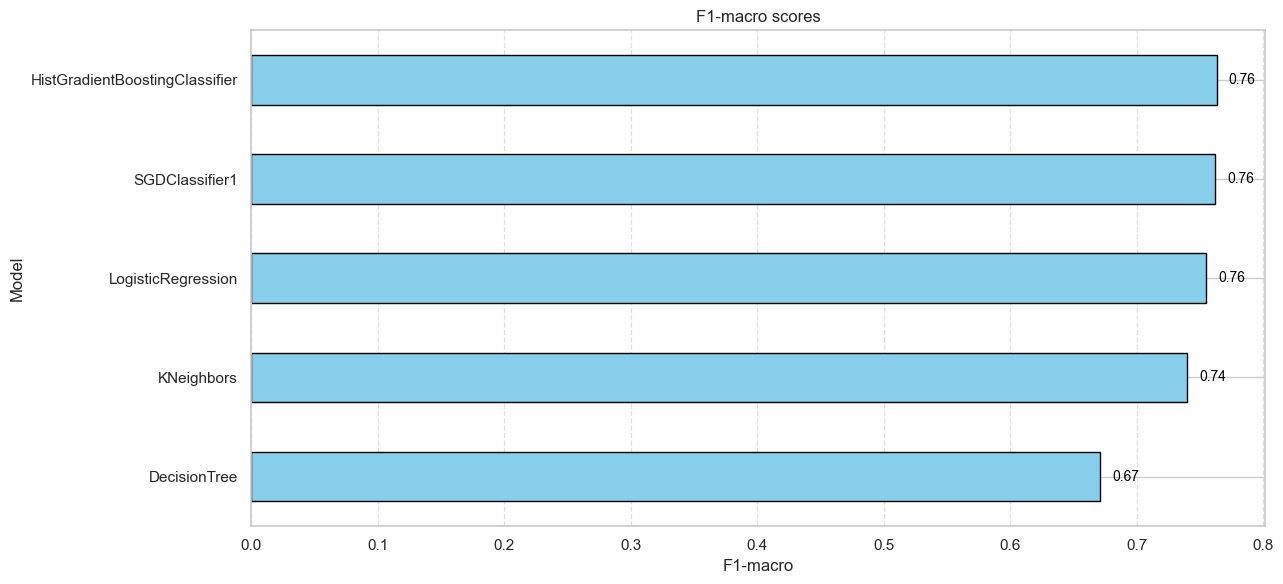

In [91]:
max_scores = all_results.groupby('Model')['f1_macro'].max().sort_values()

# create a bar plot for the best F1 scores by model
sns.set(style="whitegrid", palette="muted")
ax = max_scores.plot(kind='barh', figsize=(13, 6), color='skyblue', edgecolor='black')

# add a title and axis labels
plt.title('F1-macro scores')
plt.xlabel('F1-macro')
plt.ylabel('Model')

# set x-axis ticks to increments of 5
plt.xticks = np.arange(0, max_scores.max(), step=0.05)

# annotate the bars with their corresponding values
bars = ax.patches  # get all the bars in the plot
for bar in bars:
    # annotate each bar with its width (value)
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
                f'{bar.get_width():.2f}', ha='center', va='center', fontsize=10, color='black')

ax.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# save
save_path = f"{root_folder}/f1_macro_scores.png"
plt.savefig(save_path, dpi=300)
print(f"Plot saved as {save_path}")
plt.show()

Plot saved as experiment results/accuracy_scores.png


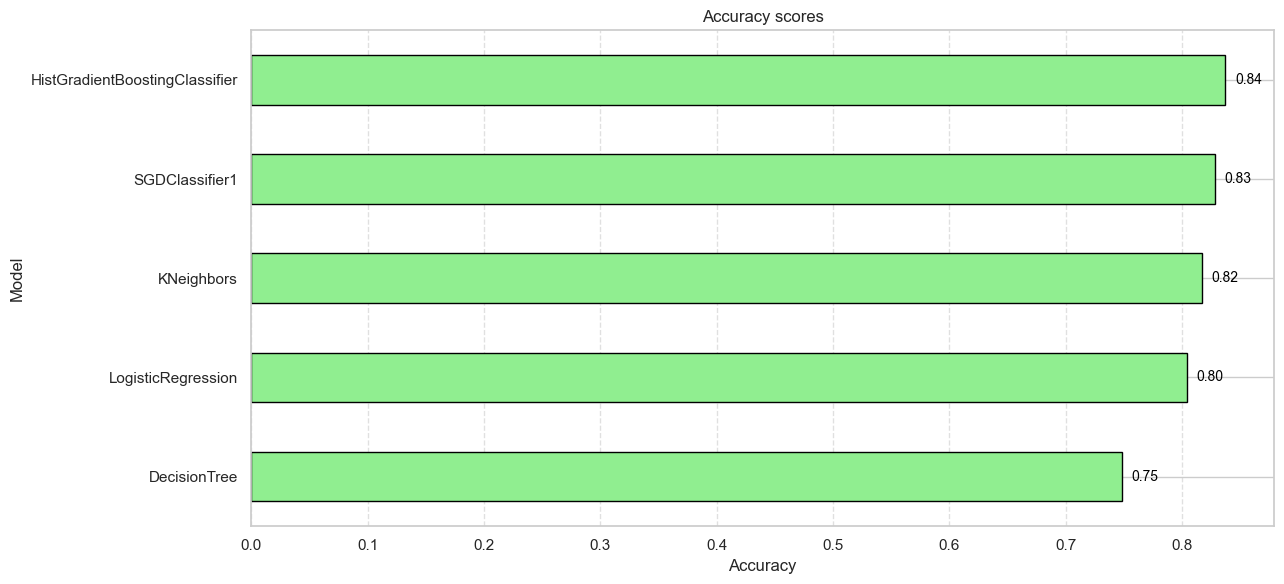

In [92]:
max_scores = all_results.groupby('Model')['accuracy'].max().sort_values()

# create a bar plot for the best F1 scores by model
sns.set(style="whitegrid", palette="muted")
ax = max_scores.plot(kind='barh', figsize=(13, 6), color='lightgreen', edgecolor='black')

# add a title and axis labels
plt.title('Accuracy scores')
plt.xlabel('Accuracy')
plt.ylabel('Model')

# set x-axis ticks to increments of 5
plt.xticks = np.arange(0, max_scores.max(), step=0.05)

# annotate the bars with their corresponding values
bars = ax.patches  # get all the bars in the plot
for bar in bars:
    # annotate each bar with its width (value)
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
                f'{bar.get_width():.2f}', ha='center', va='center', fontsize=10, color='black')

ax.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# save
save_path = f"{root_folder}/accuracy_scores.png"
plt.savefig(save_path, dpi=300)
print(f"Plot saved as {save_path}")
plt.show()